In [1]:
%matplotlib ipympl

import glob
import os

import matplotlib.pyplot as plt
import nivapy3 as nivapy
import pandas as pd
from sqlalchemy import text

plt.style.use("ggplot")

In [2]:
eng = nivapy.da.connect()

Username:  ········
Password:  ········


Connection successful.


# Compare modelled versus observed Alna discharge

Discharge data for Alna is collected by Oslo VAV. However, it is often difficult to get quality controlled data in time for the annual report. This notebook compares the monitored data from Oslo VAV with the modelled series from Stein Beldring (using HBV) so see whether we can switch to using the modelled data instead.

In [3]:
# Data delivery year for modelled data
nve_year = 2022
nve_cat_id = 6  # Alna ID in modelled data
resa_dis_stn_id = 626  # Alna ID is observed data

In [4]:
# Read modelled data
fpath = f"/home/jovyan/shared/common/elveovervakingsprogrammet/nve_hbv_modelled/nve_rid_{nve_year}/hbv_{nve_cat_id:08d}.var"
nve_df = pd.read_csv(fpath, delim_whitespace=True, header=None, names=["xdate", "mod"])
nve_df["xdate"] = pd.to_datetime(nve_df["xdate"], format="%Y%m%d/1200")
nve_df.set_index("xdate", inplace=True)
nve_df = nve_df.resample("D").mean()
nve_df.head()

,mod
xdate,
1990-01-01,2.456269
1990-01-02,2.373117
1990-01-03,2.294014
1990-01-04,2.220477
1990-01-05,2.151828


In [5]:
# Read observed data
sql = text(
    "SELECT xdate, xvalue AS obs FROM resa2.discharge_values WHERE dis_station_id = :resa_dis_stn_id"
)
vav_df = pd.read_sql(sql, eng, params={"resa_dis_stn_id": resa_dis_stn_id})
vav_df.set_index("xdate", inplace=True)
vav_df = vav_df.resample("D").mean()
vav_df.head()

,obs
xdate,
1962-01-01,2.228300
1962-01-02,2.161416
1962-01-03,2.097790
1962-01-04,2.037252
1962-01-05,1.979639


In [6]:
df = pd.concat([vav_df, nve_df], axis="columns").dropna(how="any")
df.head()

,obs,mod
xdate,,
1990-01-01,3.701542,2.456269
1990-01-02,3.563926,2.373117
1990-01-03,3.432801,2.294014
1990-01-04,3.308229,2.220477
1990-01-05,3.190212,2.151828


<Axes: xlabel='xdate'>

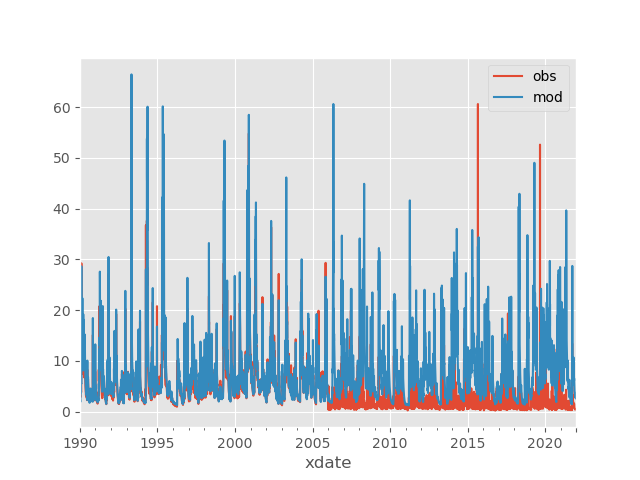

In [7]:
df.plot()